In [1]:
import pandas as pd
import numpy as np
import statistics
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [10]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [14]:
df2 = df.copy()
years = df2["YEAR"].unique()

for col in list(df2.columns[3:]):
    for year in years:
        null_index = df2[(df2["YEAR"] == year) & (df2[col].isnull())][col].index
        df2.loc[null_index, [col]] = df2.interpolate(inplace=True)
    
    df2[col] = winsorize(df2[col], (0.05, 0.05))

Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [17]:
df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,4112315.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,215.253932,261.363713,208.022281,271.050093
1,1992_ALASKA,ALASKA,1992,4112315.0,1049591.0,106780.0,720711.0,321422.0,993823.0,501563.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,215.253932,261.363713,208.022281,258.859712
2,1992_ARIZONA,ARIZONA,1992,4112315.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,208.022281,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,4112315.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,215.253932,261.363713,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,4112315.0,26260025.0,2072470.0,11047025.0,7641041.0,27138832.0,14358922.0,...,196988.0,200378.0,153112.0,1607001.0,781725.0,2447442.0,215.253932,261.363713,208.022281,265.519676


In [16]:
df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1492.000000,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,1.047278e+06,1.019848e+07,7.890471e+05,4.398164e+06,5.009140e+06,1.019298e+07,5.288266e+06,3.092804e+06,5.059483e+05,...,53187.069839,53366.210322,44291.299263,4.293266e+05,205181.673257,6.736325e+05,232.811296,275.805304,219.059233,263.374781
std,7.393983,9.726928e+05,9.060040e+06,6.874418e+05,3.511678e+06,5.026094e+06,9.027415e+06,4.709936e+06,2.778080e+06,4.573966e+05,...,52955.990178,53528.341481,43135.761613,4.298739e+05,208325.394663,6.342706e+05,8.797409,7.859532,5.204783,4.273680
min,1992.000000,1.003130e+05,1.004472e+06,7.450300e+04,3.396290e+05,3.214220e+05,9.938230e+05,5.015630e+05,3.022810e+05,4.008100e+04,...,1212.000000,1103.000000,1024.000000,9.403000e+03,5084.000000,3.794950e+04,215.253932,261.363713,208.022281,255.454710
25%,1998.000000,3.113398e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.309174e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,39506.750000,1.718665e+05,226.267129,270.096001,216.126818,260.490867
50%,2004.000000,7.992530e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.563930e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,147235.500000,4.591248e+05,234.226904,275.711254,219.771325,262.625738
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,9.209020e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,284350.500000,8.860948e+05,240.163315,282.702092,222.684611,266.855435
max,2017.000000,4.112315e+06,2.812560e+07,2.383817e+06,1.104702e+07,1.534464e+07,2.849512e+07,1.495661e+07,8.464573e+06,1.731131e+06,...,196988.000000,200378.000000,153112.000000,1.607001e+06,781725.000000,2.447442e+06,245.625575,287.997802,227.236463,271.050093


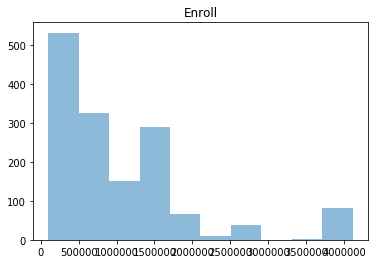

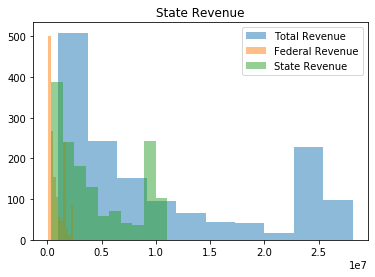

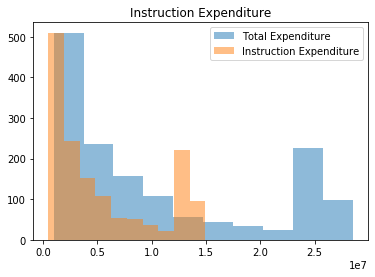

In [30]:
plt.hist(df2.ENROLL, alpha = .5)
plt.title('Enroll')
plt.show()

plt.hist(df2.TOTAL_REVENUE, alpha = .5)
plt.title('Total Revenue')

plt.hist(df2.FEDERAL_REVENUE, alpha = .5)
plt.title('Federal Revenue')

plt.hist(df2.STATE_REVENUE, alpha = .5)
plt.title('State Revenue')
plt.legend(labels = ('Total Revenue', 'Federal Revenue', 'State Revenue'))
plt.show()

plt.hist(df2.TOTAL_EXPENDITURE, alpha = .5)
plt.title('Total Expenditure')

plt.hist(df2.INSTRUCTION_EXPENDITURE, alpha = .5)
plt.title('Instruction Expenditure')
plt.legend(labels = ('Total Expenditure', 'Instruction Expenditure'))
plt.show()

Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

<function matplotlib.pyplot.show(*args, **kw)>

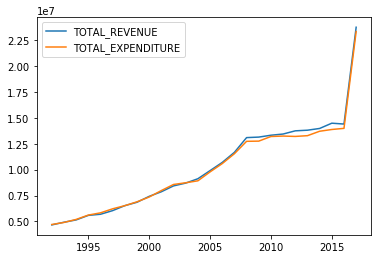

In [38]:
plt.plot(df2[df2.STATE == 'MARYLAND']['YEAR'], df2[df2.STATE == 'MARYLAND']['TOTAL_REVENUE'])
plt.plot(df2[df2.STATE == 'MARYLAND']['YEAR'], df2[df2.STATE == 'MARYLAND']['TOTAL_EXPENDITURE'])
plt.legend(labels = ('TOTAL_REVENUE', 'TOTAL_EXPENDITURE'))
plt.show

In your chosen state, which of the lessons are the students more successful, math or reading? What are the distributions of the math and reading scores in the sample?

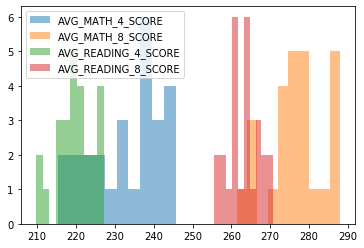

In [42]:
plt.hist(df2[df2.STATE == 'MARYLAND']['AVG_MATH_4_SCORE'], alpha = .5)
plt.hist(df2[df2.STATE == 'MARYLAND']['AVG_MATH_8_SCORE'], alpha = .5)
plt.hist(df2[df2.STATE == 'MARYLAND']['AVG_READING_4_SCORE'], alpha = .5)
plt.hist(df2[df2.STATE == 'MARYLAND']['AVG_READING_8_SCORE'], alpha = .5)

plt.legend(labels = ('AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
                     'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'))
plt.show()

Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation.

In [43]:
for col in list(df2.columns[3:]):
    for year in years:
        null_index = df2[(df2["YEAR"] == year) & (df2[col].isnull())][col].index
        df2.loc[null_index, [col]] = df2.interpolate(inplace=True)

Then compare the effects of these techniques on the distributions of the score variables.

In [44]:
df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1492.000000,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,1.047278e+06,1.019848e+07,7.890471e+05,4.398164e+06,5.009140e+06,1.019298e+07,5.288266e+06,3.092804e+06,5.059483e+05,...,53187.069839,53366.210322,44291.299263,4.293266e+05,205181.673257,6.736325e+05,232.811296,275.805304,219.059233,263.374781
std,7.393983,9.726928e+05,9.060040e+06,6.874418e+05,3.511678e+06,5.026094e+06,9.027415e+06,4.709936e+06,2.778080e+06,4.573966e+05,...,52955.990178,53528.341481,43135.761613,4.298739e+05,208325.394663,6.342706e+05,8.797409,7.859532,5.204783,4.273680
min,1992.000000,1.003130e+05,1.004472e+06,7.450300e+04,3.396290e+05,3.214220e+05,9.938230e+05,5.015630e+05,3.022810e+05,4.008100e+04,...,1212.000000,1103.000000,1024.000000,9.403000e+03,5084.000000,3.794950e+04,215.253932,261.363713,208.022281,255.454710
25%,1998.000000,3.113398e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.309174e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,39506.750000,1.718665e+05,226.267129,270.096001,216.126818,260.490867
50%,2004.000000,7.992530e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.563930e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,147235.500000,4.591248e+05,234.226904,275.711254,219.771325,262.625738
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,9.209020e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,284350.500000,8.860948e+05,240.163315,282.702092,222.684611,266.855435
max,2017.000000,4.112315e+06,2.812560e+07,2.383817e+06,1.104702e+07,1.534464e+07,2.849512e+07,1.495661e+07,8.464573e+06,1.731131e+06,...,196988.000000,200378.000000,153112.000000,1.607001e+06,781725.000000,2.447442e+06,245.625575,287.997802,227.236463,271.050093
